In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fs = 100
sec = 10
t = np.arange(0.0, sec, 1/fs)

In [3]:
def make_wave(A, t1, dt1, t2, dt2):
    wave = np.array([0.0 for i in range(len(t))])
    for i in range(len(t)):
        if t1<=t[i]<t1+dt1:
            wave[i] = A / dt1 * (t[i] - t1)
        elif t1+dt1<=t[i]<t2:
            wave[i] = A
        elif t2<=t[i]<t2+dt2:
            wave[i] = A - A / dt2 * (t[i] - t2)
    return wave

In [4]:
A = np.arange(-1.0, 1.1, 0.5)
t1 = 1
dt1 = 0.3
t2 = 6
dt2 = 0.8

In [5]:
signal_name = ['sig_1', 'sig_2']

In [6]:
signals = {}
for i in signal_name:
    signals[i] = np.array([0.0 for i in range(len(t))])

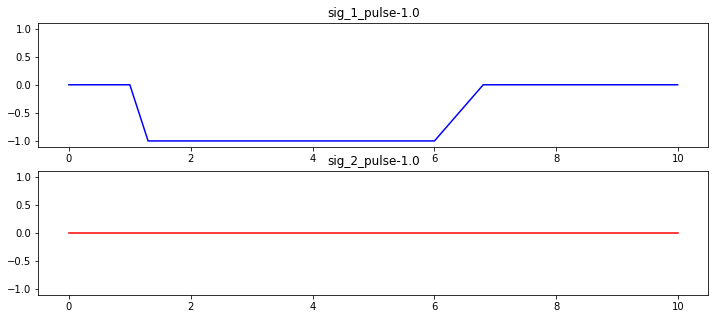

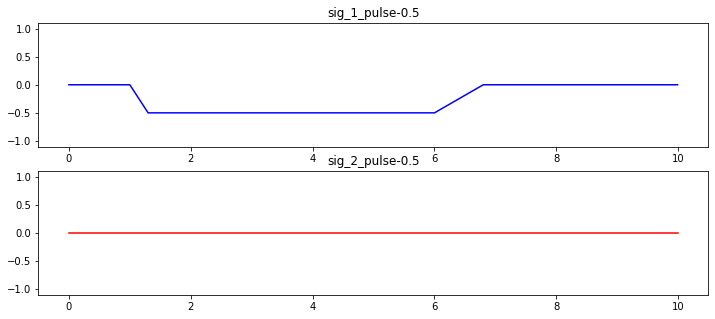

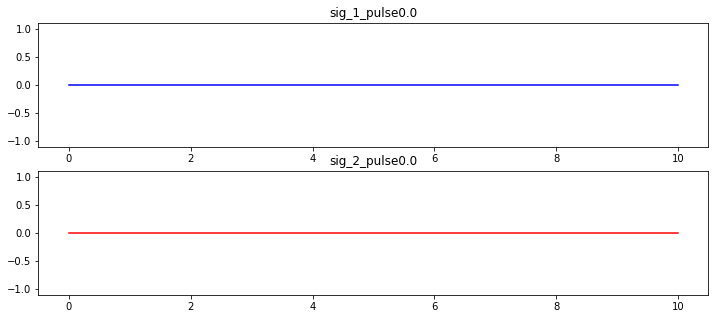

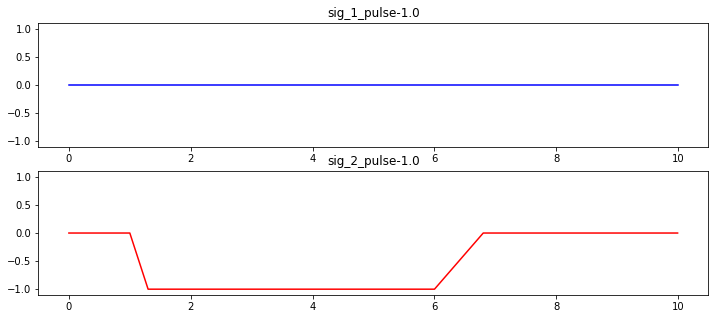

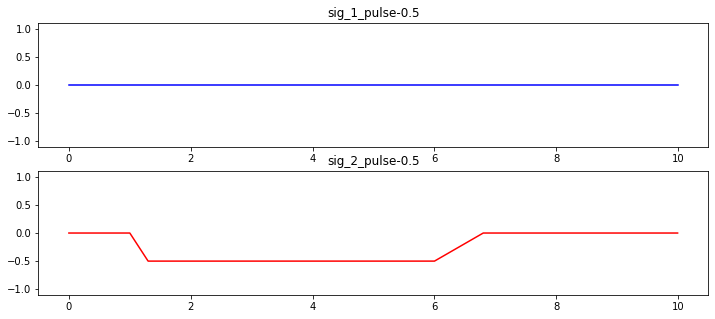

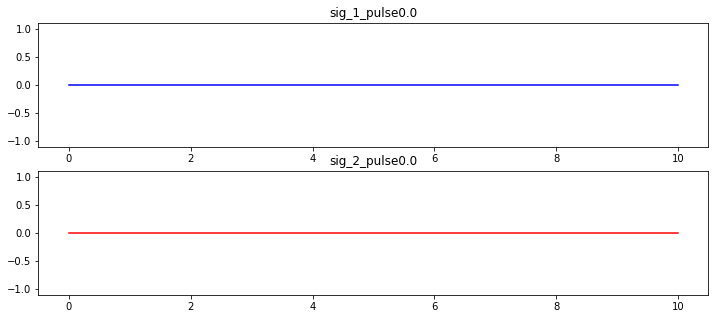

In [143]:
for j in signals.keys():
    for i in A:
        signals[j] = make_wave(i, t1, dt1, t2, dt2)
        df = pd.DataFrame(signals.values(), index=signals.keys()).T
        df.to_csv('signal_csv/test_'+j+'_pulse'+str('{:.2f}'.format(i))+'.csv')
        if A.tolist().index(i) >= 3:
            signals[j] = np.array([0.0 for i in range(len(t))])
            continue
        fig,axes = plt.subplots(2,1,figsize=(12,5), facecolor='w')
        for keyname, ax, color in zip(signals.keys(), axes, ['blue', 'red']):
            ax.set_ylim(-1.1, 1.1)
            ax.set_title(keyname + '_pulse' + str(i))
            ax.plot(t, signals[keyname], color=color)
        signals[j] = np.array([0.0 for i in range(len(t))])

In [145]:
test2 = make_wave(0,0,0,0,0)

In [147]:
test2.shape

(1000,)

In [149]:
test3 = np.concatenate([test2, test2])

In [150]:
test3.shape

(2000,)

In [152]:
test4 = np.stack([test2, test2])

In [154]:
test4.shape

(2, 1000)

In [51]:
# keyごとの波形生成
for j in signals.keys():
    for i in A:
        new_wave = make_wave(i, t1, dt1, t2, dt2)
        signals[j] = np.vstack([signals[j], new_wave])
        
        #df = pd.DataFrame(signals.values(), index=signals.keys()).T
        #df.to_csv('signal_csv/test_'+j+'_pulse'+str('{:.2f}'.format(i))+'.csv')

        #signals[j] = np.array([0.0 for i in range(len(t))])

In [52]:
signals['sig_1'].shape

(7, 1000)

In [56]:
df = pd.DataFrame(signals['sig_1']).T

In [58]:
df

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: 0, Length: 1000, dtype: float64

In [61]:
signals

{'sig_1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'sig_2': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])}

In [79]:
df_sig_1 = pd.DataFrame(signals['sig_1'][1], columns=['sig_1'])
df_sig_2 = pd.DataFrame(signals['sig_2'][1], columns=['sig_2'])

In [87]:
signals['sig_1'].shape[0]

7

In [90]:
for i in signals.keys():
    for j in range(signals[i].shape[0]):
        df_sig = pd.DataFrame(signals[i][j], columns=[i])

In [94]:
for i in range(signals['sig_1'].shape[0]):
    df_sig_1 = pd.DataFrame(signals['sig_1'][i], columns=['sig_1'])
    for j in range(signals['sig_2'].shape[0]):
        df_sig_2 = pd.DataFrame(signals['sig_2'][j], columns=['sig_2'])
        df_concat = pd.concat([df_sig_1, df_sig_2], axis=1)
        df_concat.to_csv('signal_csv/double_'+str('{:.0f}'.format(i))+'_'+str('{:.0f}'.format(j))+'.csv')

In [80]:
df_concat = pd.concat([df_sig_1, df_sig_2], axis=1)

In [81]:
df_concat

,sig_1,sig_2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


In [84]:
print(df_concat['sig_1'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: sig_1, Length: 1000, dtype: float64


In [95]:
import itertools

In [97]:
a = np.array([0,1,2])
b = np.array([4,5,6])

In [98]:
list(itertools.product(a, b))

[(0, 4), (0, 5), (0, 6), (1, 4), (1, 5), (1, 6), (2, 4), (2, 5), (2, 6)]

In [100]:
for i, j in itertools.product(a,b):
    print(i, j)

0 4
0 5
0 6
1 4
1 5
1 6
2 4
2 5
2 6


In [112]:
count = 0
for i, j in itertools.product(signals['sig_1'], signals['sig_2']):
    count += 1
    df_sig_1 = pd.DataFrame(i, columns=['sig_1'])
    df_sig_2 = pd.DataFrame(j, columns=['sig_2'])
    df_concat = pd.concat([df_sig_1, df_sig_2], axis=1)
    df_concat.to_csv('signal_csv/double_'+str('{:.0f}'.format(count))+'.csv')

In [147]:
count = 0
for i, j in itertools.product(signals['sig_1'], signals['sig_2']):
    count += 1
    ar = np.vstack([i,j])
    df = pd.DataFrame(ar.T, columns=signals.keys())
    df.to_csv('signal_csv/double_'+str('{:.0f}'.format(count))+'.csv')

In [143]:
a = [signals[l] for l in signals.keys()]

In [144]:
a

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

In [146]:
a[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [158]:
# keyごとの波形生成

for j in signals.keys():
    for i in A:
        new_wave = make_wave(i, t1, dt1, t2, dt2)
        d_sig = pd.DataFrame(new_wave, columns=['pulse_'+str(i)+''])

In [159]:
d_sig

,pulse_1.0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,0.0
996,0.0
997,0.0
998,0.0


In [162]:
pd.concat([d_sig, d_sig], axis=1).T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
pulse_1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pulse_1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
count =0
for j in signals.keys():
    for i in A:
        count += 1
        new_wave = make_wave(i, t1, dt1, t2, dt2)
        df = pd.DataFrame(new_wave, columns=[''+j+'pulse_'+str(i)+''])
        if count ==1:
            df_single = df
        else:
            df_single = pd.concat([df_single, df], axis=1)

In [201]:
df_single

,sig_1pulse_-1.0,sig_1pulse_-0.5,sig_1pulse_0.0,sig_1pulse_0.5,sig_1pulse_1.0,sig_2pulse_-1.0,sig_2pulse_-0.5,sig_2pulse_0.0,sig_2pulse_0.5,sig_2pulse_1.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
df_single['sig_1pulse_-1.0']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: sig_1pulse_-1.0, Length: 1000, dtype: float64

In [278]:
# old
def make_df(name, A, t1, dt1, t2, dt2):
    count =0
    for i in A:
        count += 1
        new_wave = make_wave(i, t1, dt1, t2, dt2)
        df = pd.DataFrame(new_wave, columns=[''+name+'_pulse_'+str('{:.2f}'.format(i))+''])
        if count ==1:
            df_single = df
        else:
            df_single = pd.concat([df_single, df], axis=1)
    return df_single

In [317]:
def make_df(name, A, t1, dt1, t2, dt2):
    count =0
    for i, j, k, l, m in itertools.product(A, t1, dt1, t2, dt2):
        count += 1
        new_wave = make_wave(i, j, k, l, m)
        df = pd.DataFrame(new_wave, columns=[''+name+'_A_'+str('{:.1f}'.format(i))+'_t1_'+str('{:.1f}'.format(j))+'_dt1_'+str('{:.1f}'.format(k))+'_t2_'+str('{:.1f}'.format(l))+'_dt2_'+str('{:.1f}'.format(m))+''])
        if count ==1:
            df_single = df
        else:
            df_single = pd.concat([df_single, df], axis=1)
    return df_single

In [318]:
# rever1
name_1 = 'rever1'
A_1 = np.arange(-1.0, 1.1, 0.5)
t1_1 = np.array([1.0])
dt1_1 = np.array([0.3])
t2_1 =  np.array([6.0])
dt2_1 = np.array([0.8])

# rever2
name_2 = 'rever2'
A_2 = np.arange(-1.0, 0.0, 0.3)
t1_2 = np.array([2.0])
dt1_2 = np.array([0.5])
t2_2 = np.array([7.0])
dt2_2 = np.array([0.5])

# rever3
name_3 = 'rever3'
A_3 = np.array([1.0])
t1_3 = np.array([5.0])
dt1_3 = np.array([0.1])
t2_3 = np.array([8.0])
dt2_3 = np.array([0.1])

# rever4
name_4 = 'rever4'
A_4 = np.array([0.7])
t1_4 = np.array([1.0])
dt1_4 = np.array([3.0])
t2_4 = np.array([6.0])
dt2_4 = np.array([3.0])

In [319]:
rever1 = make_df(name_1, A_1, t1_1, dt1_1, t2_1, dt2_1)
rever2 = make_df(name_2, A_2, t1_2, dt1_2, t2_2, dt2_2)
rever3 = make_df(name_3, A_3, t1_3, dt1_3, t2_3, dt2_3)
rever4 = make_df(name_4, A_4, t1_4, dt1_4, t2_4, dt2_4)

In [320]:
rever1

,rever1_A_-1.0_t1_1.0_dt1_0.3_t2_6.0_dt2_0.8,rever1_A_-0.5_t1_1.0_dt1_0.3_t2_6.0_dt2_0.8,rever1_A_0.0_t1_1.0_dt1_0.3_t2_6.0_dt2_0.8,rever1_A_0.5_t1_1.0_dt1_0.3_t2_6.0_dt2_0.8,rever1_A_1.0_t1_1.0_dt1_0.3_t2_6.0_dt2_0.8
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0


In [321]:
for (i, j), (k, l), (m, n), (o, p) in itertools.product(rever1.items(), rever2.items(), rever3.items(), rever4.items()):
    df = pd.concat([j, l, n, p],axis=1)
    df.to_csv('signal_csv/'+i+'+'+k+'+'+m+'+'+o+'.csv')

In [322]:
df

,rever1_A_1.0_t1_1.0_dt1_0.3_t2_6.0_dt2_0.8,rever2_A_-0.1_t1_2.0_dt1_0.5_t2_7.0_dt2_0.5,rever3_A_1.0_t1_5.0_dt1_0.1_t2_8.0_dt2_0.1,rever4_A_0.7_t1_1.0_dt1_3.0_t2_6.0_dt2_3.0
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
995,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0


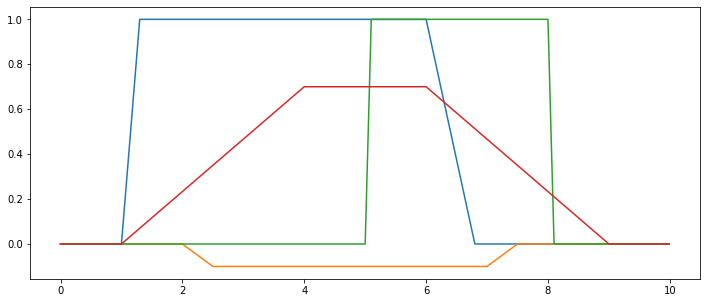

In [316]:
plt.figure(figsize=(12,5), facecolor='w')
for labels, items in df.iteritems():
    a = labels
    b = items
    plt.plot(t, b)

In [296]:
a

'rever4_pulse_0.70'

In [297]:
b

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: rever4_pulse_0.70, Length: 1000, dtype: float64

In [248]:
pd.concat([b,b],axis=1)

,pulse_1.00,pulse_1.00
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


In [257]:
rever1.values

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [260]:
rever1.keys()

Index(['pulse_-1.00', 'pulse_-0.50', 'pulse_0.00', 'pulse_0.50', 'pulse_1.00'], dtype='object')

In [268]:
rever1.items()

<generator object DataFrame.items at 0x7fcf28cbf250>